In [5]:
import pandas as pd
import numpy as np
import keras
from ML.Models.MLP import MLP
from src import utilities

#### Loading the data

In [6]:
higgs_trainning = pd.read_csv('../Data/HiggsTrainning.csv', header=None).to_numpy()
higgs_validation = pd.read_csv('../Data/HiggsValidation.csv', header=None).to_numpy()
higgs_test = pd.read_csv('../Data/HiggsTest.csv', header=None).to_numpy()

In [7]:
y_train, X_train = higgs_trainning[:, 0], higgs_trainning[:, 1:22]
y_train = np.array([[i == label for i in range(2)] for label in y_train], dtype=np.float32)
y_val, X_val = higgs_validation[:, 0], higgs_validation[:, 1:22]
y_val = np.array([[i == label for i in range(2)] for label in y_val], dtype=np.float32)
y_test, X_test = higgs_test[:, 0], higgs_test[:, 1:22]
y_test = np.array([[i == label for i in range(2)] for label in y_test], dtype=np.float32)

#### Defining the Model

In [8]:
# creating the model for the MLP
input_layer = keras.layers.Input(shape=[21])
mlp = MLP(num_neurons=32)(input_layer)
output_layer = keras.layers.Dense(2, activation='softmax')(mlp)
model = keras.models.Model(inputs=input_layer, outputs=output_layer)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 21)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mlp_1 (MLP)                     │ (None, 32)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,266 (12.76 KB)

 Trainable params: 3,074 (12.01 KB)

 Non-trainable params: 192 (768.00 B)

In [9]:
# compiling and trainning the model
model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
early_stopping = keras.callbacks.EarlyStopping(patience=30, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 2s 431us/step - accuracy: 0.5431 - loss: 0.6969 - val_accuracy: 0.5908 - val_loss: 0.6652
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.5912 - loss: 0.6663 - val_accuracy: 0.6086 - val_loss: 0.6552
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.6078 - loss: 0.6560 - val_accuracy: 0.6202 - val_loss: 0.6487
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.6154 - loss: 0.6491 - val_accuracy: 0.6292 - val_loss: 0.6411
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.6236 - loss: 0.6449 - val_accuracy: 0.6300 - val_loss: 0.6388
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 391us/step - accuracy: 0.6271 - loss: 0.6408 - val_accuracy: 0.6324 - val_loss: 0.6372
Epoch 7/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 411us/step - accuracy: 0.6370 - loss: 0.6352 - val_accuracy: 0.6376 - val_loss: 0.6329
Epoch 8/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 

#### Some quick checks

In [10]:
# perfoming the prediction
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 0s 251us/step


In [11]:
print("Trainnig set:")
utilities.display_metrics(y_true=y_train, y_pred=y_train_pred)
print("Validation set:")
utilities.display_metrics(y_true=y_val, y_pred=y_val_pred)
print("Test set:")
utilities.display_metrics(y_true=y_test, y_pred=y_test_pred)

Trainnig set:
Recall: 0.6389
Precision: 0.6877
Confusion Matrix:
[[25024  8766]
 [10909 19301]]
Validation set:
Recall: 0.6062
Precision: 0.6487
Confusion Matrix:
[[5961 2481]
 [2976 4582]]
Test set:
Recall: 0.6155
Precision: 0.6574
Confusion Matrix:
[[7587 3015]
 [3614 5785]]


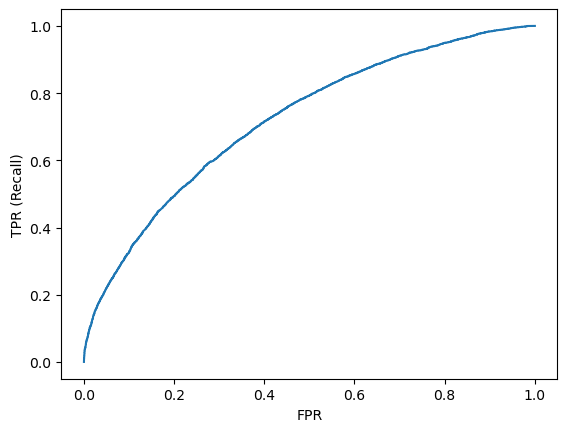

AUC: 0.7205


In [12]:
utilities.display_roc_curve(y_true=y_val, y_pred=y_val_pred)

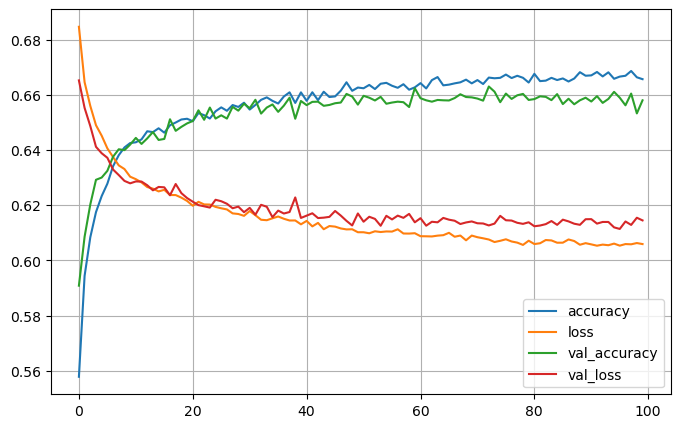

In [13]:
utilities.plot_hist_trainning(history)

In [14]:
utilities.save_model(model, history, "MLP/MLP")